## Sistema con un grado de Libertad: amortiguamiento crítico

#### Problema.

Un sistema de un grado de libertad tiene las propiedades siguientes: m =
0.2533 kip-s2/pulg, k = 10 kips/pulg. Determine las respuesta y(t), y'(t), y''(t) en vibración libre con
amortiguamiento debido a una velocidad inicial de 40 cm/s con ξ = 1.00.



Solución:

In [2]:
# Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Iniciamos las variables
m = 0.2533  # masa
k = 10  # rigidez
v0 = 40  # velocidad inicial en cm/s
y0 = 0  # desplazamiento inicial en cm
e = 1.00  # razón de amortiguamiento  

tf = 5.0  # tiempo de análisis para el gráfico
tt = 0.4  # tiempo de análisis para los datos en tabla
dt = 0.02 # intervalo de tiempo

Cálculos:

In [6]:
w = (k/m)**0.5  # Frecuencia natural angular (rad/s)
T = 2*np.pi/w  #  Periodo de la estructura

In [7]:
t = np.arange(0,tf+dt,dt) # creamos un vector con el tiempo


#### Ecuación de Movimiento

$$ y(t) = v_0 t e^{-\omega_n t}
$$

In [8]:
# Ecuación de movimiento
y = lambda t: v0 * t * np.exp(- w * t)

# Aproximaremos las derivadas con:
h = 0.0000001
df = lambda t: (y(t+h)-y(t))/h  # Primera derivada
df2 = lambda t: (df(t+h)-df(t))/h  # Segunda derivada

In [17]:
# Resultados del desplazamiento
ttt = np.arange(0, tt + dt, dt) # creamos un vector con el tiempo para la tabla
Df = pd.DataFrame({"t(s)":ttt,"y":[round(y(i),3) for i in ttt],"v":[round(df(i),3) for i in ttt],"a":[round(df2(i),3) for i in ttt]})
Df

,t(s),y,v,a
0,0.00,0.000,40.000,-502.657
1,0.02,0.706,30.843,-415.434
2,0.04,1.244,23.292,-341.815
3,0.06,1.646,17.093,-279.821
4,0.08,1.936,12.034,-227.685
5,0.10,2.134,7.931,-183.942
6,0.12,2.258,4.630,-147.349
7,0.14,2.324,1.997,-116.795
8,0.16,2.342,-0.078,-91.438
9,0.18,2.324,-1.691,-70.521


Text(0, 0.5, 'Desplazamiento (cm)')

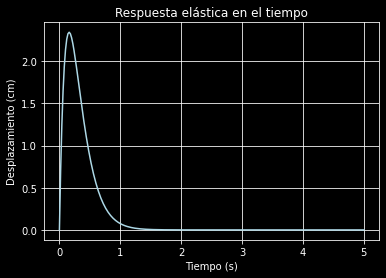

In [18]:
# Graficamos  el Desplazamiento
plt.style.use('dark_background')
plt.plot(t,y(t),color='lightblue')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Desplazamiento (cm)")

Text(0, 0.5, 'Velocidad (cm/s)')

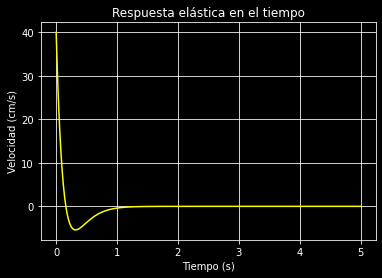

In [19]:
# Graficamos  la velocidad
plt.plot(t,df(t),color='yellow')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")

Text(0, 0.5, 'Aceleración ($cm/s^2$)')

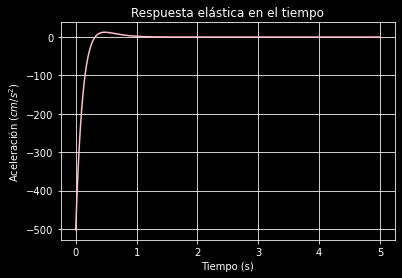

In [20]:
# Graficamos  la aceleración
plt.plot(t,df2(t),color='pink')
plt.grid()
plt.title("Respuesta elástica en el tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Aceleración ($cm/s^2$)")